In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:\Recunoastere_semne_circulatie')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

d:\recunoastere_semne_circulatie\web_ui\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\recunoastere_semne_circulatie\web_ui\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\recunoastere_semne_circulatie\web_ui\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\recunoastere_semne_circulatie\web_ui\venv\l

43


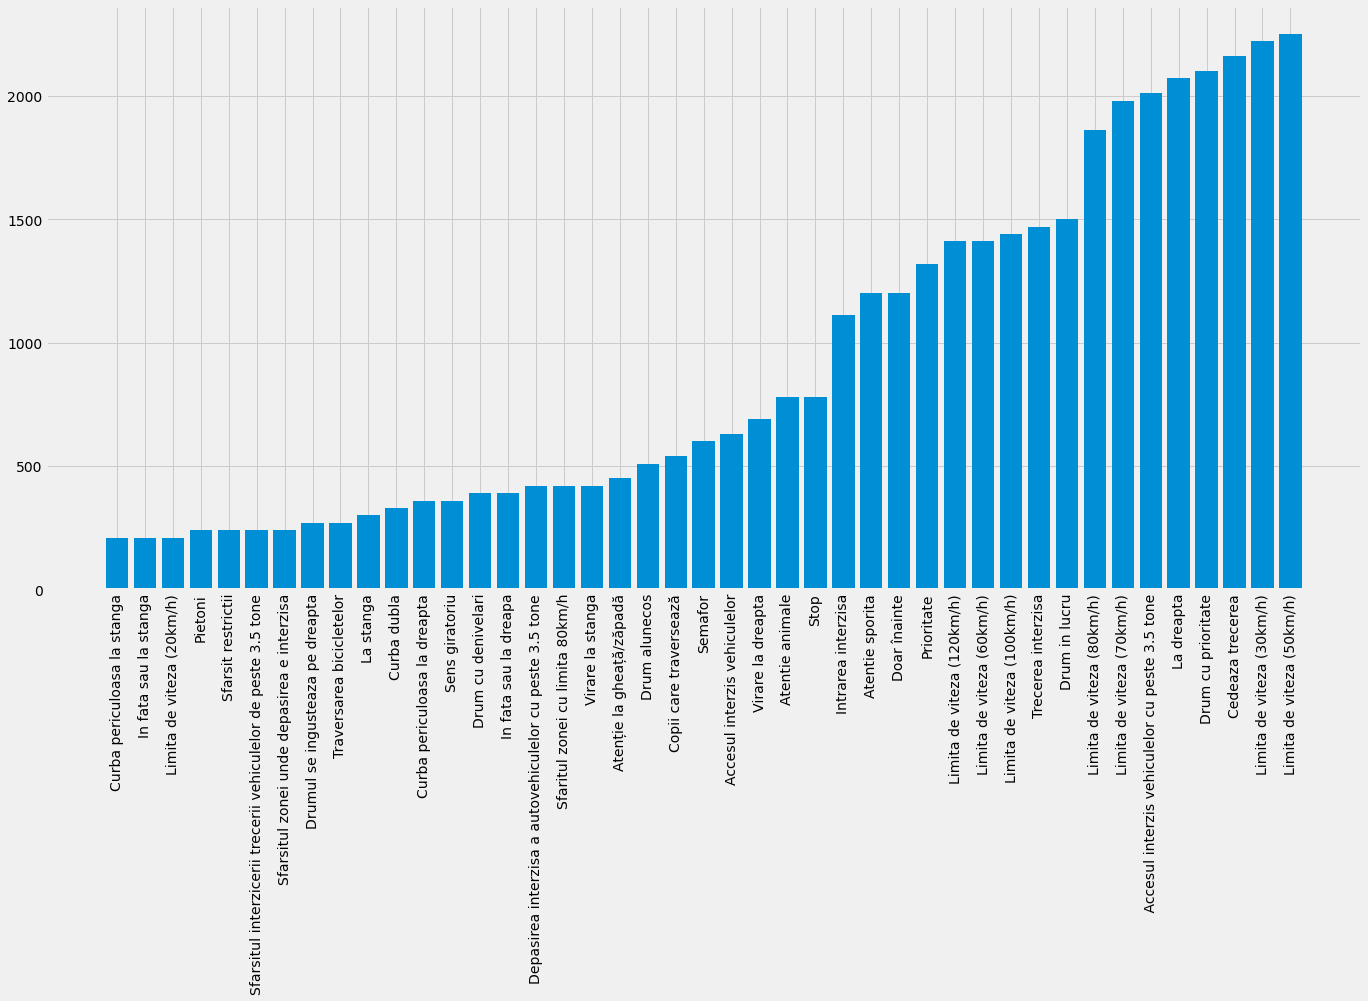

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

data_dir = "D:\\Recunoastere_semne_circulatie"
train_path = 'D:\\Recunoastere_semne_circulatie\\Train'
test_path = 'D:\\Recunoastere_semne_circulatie\\Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

NUM_CATEGORIES = len(os.listdir(train_path))
print(NUM_CATEGORIES)

# Label Overview
classes = { 0:'Limita de viteza (20km/h)',
            1:'Limita de viteza (30km/h)',
            2:'Limita de viteza (50km/h)',
            3:'Limita de viteza (60km/h)',
            4:'Limita de viteza (70km/h)',
            5:'Limita de viteza (80km/h)',
            6:'Sfaritul zonei cu limita 80km/h',
            7:'Limita de viteza (100km/h)',
            8:'Limita de viteza (120km/h)',
            9:'Trecerea interzisa',
            10:' Accesul interzis vehiculelor cu peste 3.5 tone',
            11:'Prioritate',
            12:'Drum cu prioritate',
            13:'Cedeaza trecerea',
            14:'Stop',
            15:'Accesul interzis vehiculelor',
            16:'Depasirea interzisa a autovehiculelor cu peste 3.5 tone',
            17:'Intrarea interzisa',
            18:'Atentie sporita',
            19:'Curba periculoasa la stanga',
            20:'Curba periculoasa la dreapta',
            21:'Curba dubla',
            22:'Drum cu denivelari',
            23:'Drum alunecos',
            24:'Drumul se ingusteaza pe dreapta',
            25:'Drum in lucru',
            26:'Semafor',
            27:'Pietoni',
            28:'Copii care traversează',
            29:'Traversarea bicicletelor',
            30:'Atenție la gheață/zăpadă',
            31:'Atentie animale',
            32:'Sfarsit restrictii',
            33:'Virare la dreapta',
            34:'Virare la stanga',
            35:'Doar înainte',
            36:'In fata sau la dreapa',
            37:'In fata sau la stanga',
            38:'La dreapta',
            39:'La stanga',
            40:'Sens giratoriu',
            41:'Sfarsitul zonei unde depasirea e interzisa',
            42:'Sfarsitul interzicerii trecerii vehiculelor de peste 3.5 tone' }

folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [3]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'D:\\Recunoastere_semne_circulatie'

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
# Changing the list to numpy array
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 2
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 96s 3ms/step - loss: 1.7548 - accuracy: 0.5644 - val_loss: 0.2844 - val_accuracy: 0.9302
Epoch 2/2
31367/31367 [==============================] - 83s 3ms/step - loss: 0.4616 - accuracy: 0.8686 - val_loss: 0.1168 - val_accuracy: 0.9703


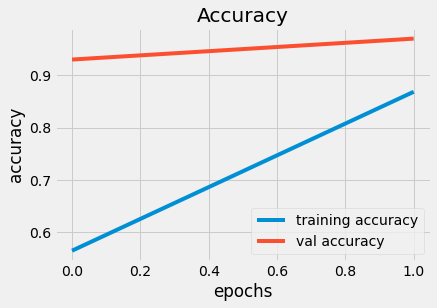

In [12]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

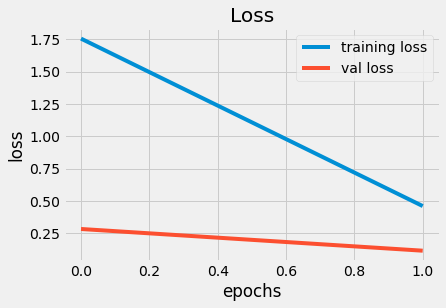

In [13]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [14]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [15]:
X_test, label = testing('Test.csv')

In [16]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

## Accuracy with the test data

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9407759303246239


## Save the model

In [18]:
model.save("./training/model1_tsr.h5")

## Load the Model

In [19]:
import os
os.chdir(r'D:\Recunoastere_semne_circulatie')
from keras.models import load_model
model = load_model('./training/model1_tsr.h5')

In [20]:
classes = { 0:'Limita de viteza (20km/h)',
            1:'Limita de viteza (30km/h)',
            2:'Limita de viteza (50km/h)',
            3:'Limita de viteza (60km/h)',
            4:'Limita de viteza (70km/h)',
            5:'Limita de viteza (80km/h)',
            6:'Sfaritul zonei cu limita 80km/h',
            7:'Limita de viteza (100km/h)',
            8:'Limita de viteza (120km/h)',
            9:'Depasirea interzisa',
            10:'Depasirea interzisa a autovehiculelor cu peste 3.5 tone',
            11:'Prioritate',
            12:'Drum cu prioritate',
            13:'Cedeaza trecerea',
            14:'Stop',
            15:'Accesul interzis vehiculelor',
            16:'Accesul interzis vehiculelor cu peste 3.5 tone',
            17:'Intrarea interzisa',
            18:'Atentie sporita',
            19:'Curba periculoasa la stanga',
            20:'Curba periculoasa la dreapta',
            21:'Curba dubla',
            22:'Drum cu denivelari',
            23:'Drum alunecos',
            24:'Drumul se ingusteaza pe dreapta',
            25:'Drum in lucru',
            26:'Semafor',
            27:'Pietoni',
            28:'Copii care traversează',
            29:'Traversarea bicicletelor',
            30:'Atenție la gheață/zăpadă',
            31:'Atentie animale',
            32:'Sfarsit restrictii',
            33:'Virare la dreapta',
            34:'Virare la stanga',
            35:'Doar înainte',
            36:'In fata sau la dreapa',
            37:'In fata sau la stanga',
            38:'La dreapta',
            39:'La stanga',
            40:'Sens giratoriu',
            41:'Sfarsitul zonei unde depasirea e interzisa',
            42:'Sfarsitul interzicerii trecerii vehiculelor de peste 3.5 tone' }

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Semnul de circulatie este:  Depasirea interzisa


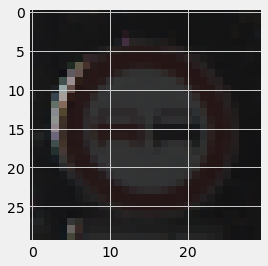

In [22]:
plot,prediction = test_on_img(r'D:\Recunoastere_semne_circulatie\Test\00022.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Semnul de circulatie este: ", classes[a])
plt.imshow(plot)
plt.show()